<a href="https://colab.research.google.com/github/Lokeshkalli/Netflix-Casestudy/blob/main/Netflix_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

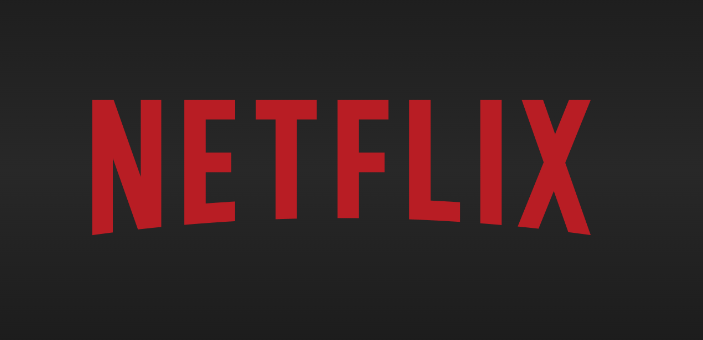

# Defining Problem Statement and Analysing basic metrics

**Problem**: Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show_id**: Unique ID for every Movie / Tv Show.

**Type**: Identifier - A Movie or TV Show

**Title**: Title of the Movie / Tv Show

**Director**: Director of the Movie

**Cast**: Actors involved in the movie/show

**Country**: Country where the movie/show was produced

**Date_added**: Date it was added on Netflix

**Release_year**: Actual Release year of the movie/show

**Rating**: TV Rating of the movie/show

**Duration**: Total Duration - in minutes or number of seasons

**Listed_in**: Genre

**Description**: The summary description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv('/content/netflix_business_case.csv')

In [ ]:
df = data.copy()

## Basic Metric Analysis

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#  Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

## Mising values

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



*   As we can see from above stats we have nulls in **director, cast, country,date_added, rating.**
*   We will fill **NA** with some meaning full value like not mentioned etc.



### Replacing Values of Director, Cast, Country

In [ ]:
df['director'] = df['director'].fillna("No Director")
df['cast'] = df['cast'].fillna("Unknown Actor")
df['country'] = df['country'].fillna("Unknown country")





*   As **rating** and **duration** have less **NA** values we fill try replace them with **mode**.



### Replacing Values rating

In [ ]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,No Director,"Oprah Winfrey, Ava DuVernay",Unknown country,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,No Director,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,No Director,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
# creating a dictionary to store the mode
rating_substitute={}
rating_substitute['Movie']=df[df['type']=='Movie']['rating'].mode()[0]
rating_substitute['TV Show']=df[df['type']=='TV Show']['rating'].mode()[0]
rating_substitute['TV Show']


# Replacing the null values with mode
df['rating'] =df.apply(lambda x: rating_substitute['Movie'] if x['type']=='Movie' and pd.isna(x['rating'])
else rating_substitute['TV Show']
if x['type']=='TV Show' and pd.isna(x['rating']) else x['rating'],axis=1 )

### Replacing Values of Duration

In [ ]:
# creating a dictionary to store mode values of duration
duration_substitute={}
duration_substitute['Movie']=df[df['type']=='Movie']['duration'].mode()[0]
duration_substitute['TV Show']=df[df['type']=='TV Show']['duration'].mode()[0]
duration_substitute['TV Show']

# Replacing the null values with mode
df['duration'] =df.apply(lambda x: duration_substitute['Movie'] if x['type']=='Movie' and pd.isna(x['duration'])
else duration_substitute['TV Show']
                                 if x['type']=='TV Show' and pd.isna(x['duration']) else x['duration'],axis=1 )

In [ ]:
df['duration'].isna().sum()

0

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8797 non-null   object
 9   duration      8797 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 824.8+ KB


* After operations like cleaning,replacing and droping the data we have 8797 rows .

## Un-nesting the columns

## Function for un-nesting the columns

In [ ]:
def unnesting(df,splitting_col,name):
  splitted_data = df[splitting_col].apply(lambda x:x.split(", ")).tolist() # spliting the names
  return pd.DataFrame(splitted_data, index = df['title']).stack().reset_index().drop(columns = "level_1").rename(columns = {0:name}) # creating a dataframe

### Director name un-nesting




In [ ]:
column_name = 'directors'
directors = unnesting(df,'director',column_name)
print(directors.head(5))
print('-'*50)


column_name = 'cast'
cast = unnesting(df,'cast',column_name)
print(cast.head(5))
print('-'*50)


column_name = 'country'
country = unnesting(df,'country',column_name)
print(country.head(5))
print('-'*50)


column_name = 'listed_in'
listed_in = unnesting(df,'listed_in',column_name)
print(listed_in.head(5))
print('-'*50)

                   title        directors
0   Dick Johnson Is Dead  Kirsten Johnson
1          Blood & Water      No Director
2              Ganglands  Julien Leclercq
3  Jailbirds New Orleans      No Director
4           Kota Factory      No Director
--------------------------------------------------
                  title            cast
0  Dick Johnson Is Dead   Unknown Actor
1         Blood & Water      Ama Qamata
2         Blood & Water     Khosi Ngema
3         Blood & Water   Gail Mabalane
4         Blood & Water  Thabang Molaba
--------------------------------------------------
                   title          country
0   Dick Johnson Is Dead    United States
1          Blood & Water     South Africa
2              Ganglands  Unknown country
3  Jailbirds New Orleans  Unknown country
4           Kota Factory            India
--------------------------------------------------
                  title               listed_in
0  Dick Johnson Is Dead           Documentaries
1      

# Duration unnesting

In [ ]:
print(df['type'].unique())
df[df['type']=='Movie']['duration']

['Movie' 'TV Show']


0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8791     96 min
8792    158 min
8794     88 min
8795     88 min
8796    111 min
Name: duration, Length: 6131, dtype: object

In [ ]:
df['minutes'] = df[df['type']=='Movie']['duration'].apply(lambda x:x.split(" ")[0]).astype('float64')
df['season'] = df[df['type']=='TV Show']['duration'].apply(lambda x:int(x.split(" ")[0]))


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,No Director,Unknown Actor,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


## Shape Of Data

In [ ]:
df.shape

(8797, 14)

## Data Types

In [ ]:


df.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
minutes         float64
season          float64
dtype: object

# statistical summary

In [ ]:
df.describe()

,release_year,minutes,season
count,8797.000000,6131.000000,2666.000000
mean,2014.183472,99.572500,1.751313
std,8.822191,28.284463,1.550176
min,1925.000000,3.000000,1.000000
25%,2013.000000,87.000000,1.000000
50%,2017.000000,98.000000,1.000000
75%,2019.000000,114.000000,2.000000
max,2021.000000,312.000000,17.000000


* We can observe statistical summary of **numeric** data i.e count, mean, std, min, 1st quartile, 2nd quartile, 3rd quartile maximum

In [ ]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797
unique,8797,2,8797,4529,7683,749,1767,17,220,513,8765
top,s1,Movie,Dick Johnson Is Dead,No Director,Unknown Actor,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2624,825,2812,109,3209,1793,362,4


In [ ]:
cast[cast['cast']!='Unknown Actor'].describe()

,title,cast
count,64057,64057
unique,7972,36403
top,Social Distance,Anupam Kher
freq,50,43


In [ ]:
country.describe()

,title,country
count,10835,10835
unique,8797,128
top,Barbecue,United States
freq,12,3683


In [ ]:
listed_in.describe()

,title,listed_in
count,19303,19303
unique,8797,42
top,Zubaan,International Movies
freq,3,2752


# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
genre=pd.merge(listed_in,df[['title','type']],on='title',how='left')

In [ ]:
genre['listed_in'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

In [ ]:
listed_in['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
country['country'].value_counts()

United States      3683
India              1046
Unknown country     830
United Kingdom      803
Canada              445
                   ... 
Bermuda               1
Ecuador               1
Armenia               1
Mongolia              1
Montenegro            1
Name: country, Length: 128, dtype: int64

In [ ]:
country['country'].unique()

array(['United States', 'South Africa', 'Unknown country', 'India',
       'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Sene

In [ ]:
directors['directors'].nunique()

4994

## Analysis on top 10 Genre and top 10 countries

In [ ]:
genre[genre['type']=='TV Show'].groupby('listed_in').size().sort_values(ascending=False).head(10)

listed_in
International TV Shows    1350
TV Dramas                  762
TV Comedies                574
Crime TV Shows             469
Kids' TV                   449
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               175
dtype: int64

In [ ]:
genre[genre['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False).head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
dtype: int64

In [ ]:
top10_genre = genre['listed_in'].value_counts().head(10)
print(top10_genre)

print('-'* 35)
top10_countries = country['country'].value_counts().head(10)
top10_countries

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64
-----------------------------------


United States      3683
India              1046
Unknown country     830
United Kingdom      803
Canada              445
France              393
Japan               317
Spain               232
South Korea         231
Germany             226
Name: country, dtype: int64

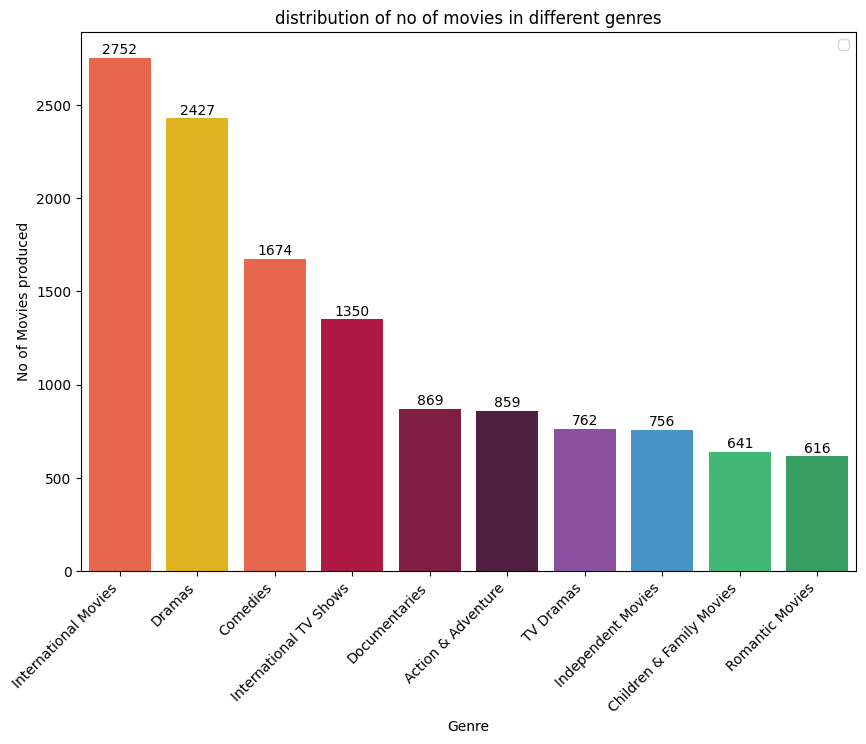

In [ ]:
plt.figure(figsize=(10,7))
custom_palette = ["#FF5733", "#FFC300", "#FF5733", "#C70039", "#900C3F",
                  "#581845", "#8E44AD", "#3498DB", "#2ECC71", "#27AE60"]
ax=sns.countplot(x='listed_in',data=genre,order=genre['listed_in'].value_counts().head(10).index,palette=custom_palette)

plt.xlabel("Genre")
plt.ylabel("No of Movies produced")
plt.title("distribution of no of movies in different genres")
plt.xticks(rotation=45, ha='right')
plt.legend()
counts= genre['listed_in'].value_counts().head(10)
for i, count in enumerate(counts):
    plt.text(i, count + 0.0075*(genre['listed_in'].value_counts().head(10).max()), count, ha='center')
plt.show()


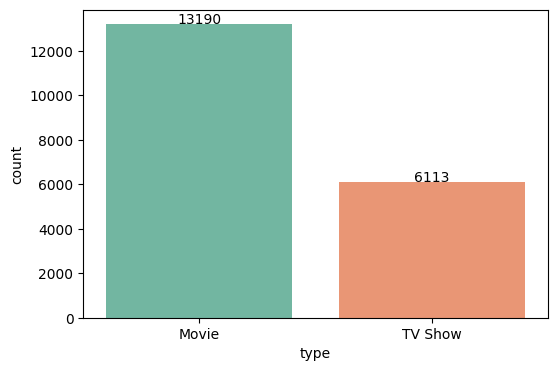

In [ ]:
plt.figure(figsize=(6,4))
custom_palette = sns.color_palette("Set2", 2)

ax = sns.countplot(x='type',data=genre,palette=custom_palette)
counts= genre['type'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 0.0085*(genre['listed_in'].value_counts().head(10).max()), count, ha='center')
plt.show()

* Almost 70 percent of content is from movies and 30 percent content is from tv shows.
* The United States and India are at the forefront, contributing the highest volume of content to the Netflix platform.
* International movies and dramas stand out as the genres contributing the highest volume of content.



# 2. Comparison of tv shows vs. movies.



In [ ]:
country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown country
3,Jailbirds New Orleans,Unknown country
4,Kota Factory,India


In [ ]:
countries = country[country['country']!='Unknown country']
countries['country'].value_counts()

United States     3683
India             1046
United Kingdom     803
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

In [ ]:
countries.groupby('country')['title'].count().sort_values(ascending =False).head(10)

country
United States     3683
India             1046
United Kingdom     803
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: title, dtype: int64

In [ ]:
countries.shape

(10005, 2)

In [ ]:
shows = pd.merge(countries,df[['title','type']],on='title',how='left')
top_10_tv_shows = shows[shows['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).head(10)
top10_Movies = shows[shows['type']=='Movie'].groupby('country')['title'].count().sort_values(ascending=False).head(10)

print(top_10_tv_shows)
print('-'*40)
top10_Movies

country
United States     932
United Kingdom    271
Japan             198
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          65
Spain              61
Name: title, dtype: int64
----------------------------------------


country
United States     2751
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: title, dtype: int64

In [ ]:
top10_countries = shows.groupby('country')['title'].count().sort_values(ascending=False).head(10)
coutries_contribution = countries['country'].apply(lambda x: x if x in top10_countries.index else 'Others' )
coutries_contribution

0        United States
1               Others
4                India
7        United States
8               Others
             ...      
10829           Others
10830    United States
10832    United States
10833    United States
10834            India
Name: country, Length: 10005, dtype: object

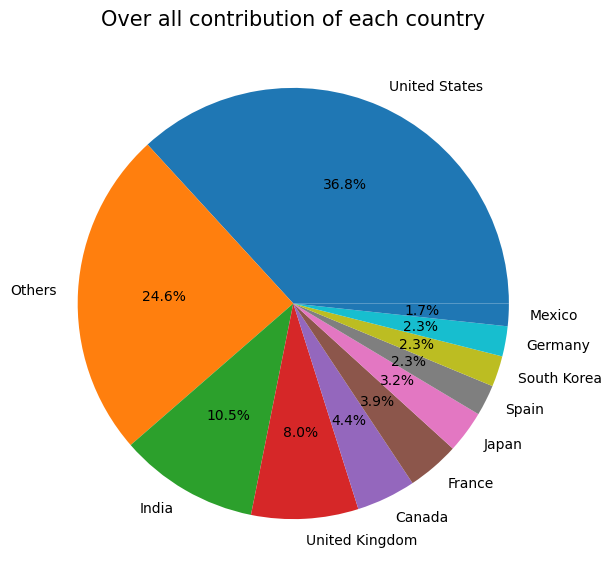

In [ ]:
plt.figure(figsize = (7,7))
plt.pie(coutries_contribution.value_counts(), labels = coutries_contribution.value_counts().index, autopct='%1.1f%%')

plt.title('Over all contribution of each country' , fontsize = 15)
plt.show()

In [ ]:
countries = countries.merge(df[['title','type']],on='title',how='left')
top10_distribution = countries[countries['country'].isin(top10_countries.index)]
top10_distribution.reset_index(drop=True,inplace=True)


<Axes: xlabel='country', ylabel='count'>

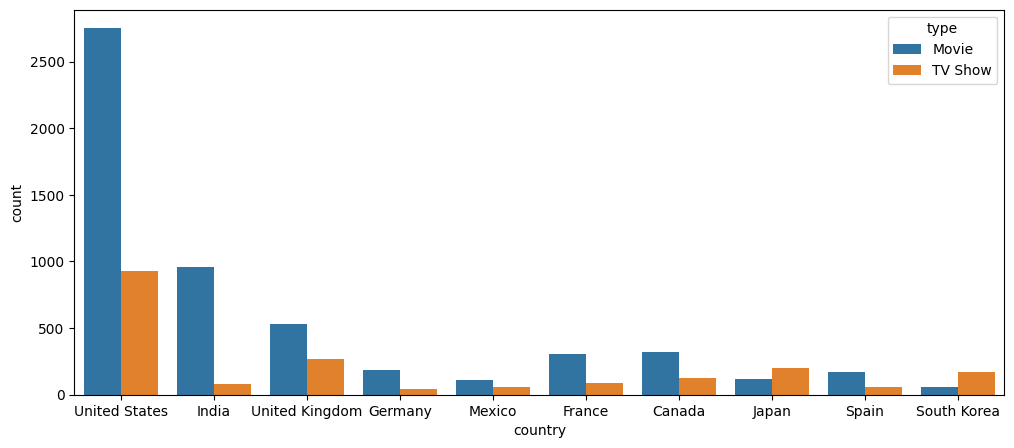

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='country',hue='type',data=top10_distribution)


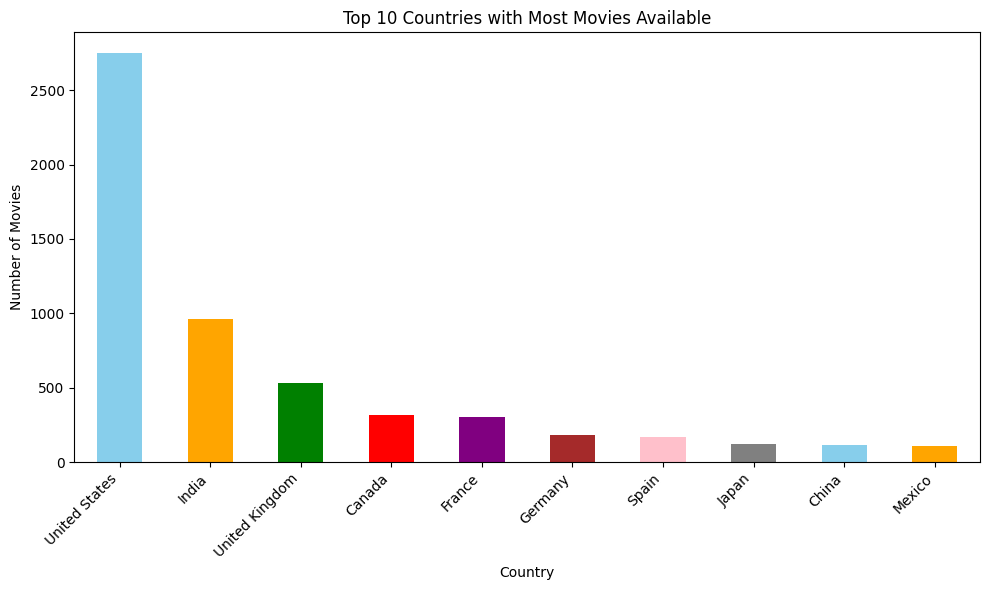

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
top10_Movies.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Top 10 Countries with Most Movies Available')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

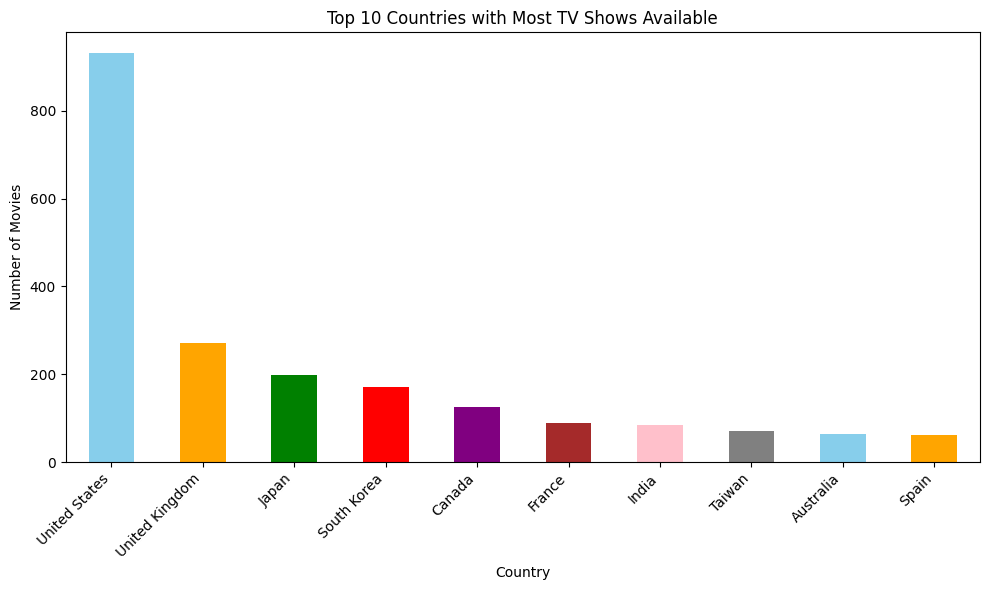

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
top_10_tv_shows.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Top 10 Countries with Most TV Shows Available')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# 3. What is the best time to launch a TV show?
### a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df['week_no']=df['date_added'].apply(lambda x: x.weekofyear)
# Group by week number and count the number of TV shows released each week
tv_show_weekly_count = df[df['type']=='TV Show'].groupby(by='week_no').size().sort_values(ascending=False)
# Find the week with the highest number of TV show releases
best_tv_show_week = tv_show_weekly_count.idxmax()

print("Week with the highest number of TV show releases:", best_tv_show_week)
print("Number of TV show releases in the best week:", tv_show_weekly_count.max())

Week with the highest number of TV show releases: 27
Number of TV show releases in the best week: 86


In [ ]:
# Group by week number and count the number of TV shows released each week
Movie_weekly_count=df[df['type']=='Movie'].groupby(by='week_no').size().sort_values(ascending=False)
# Find the week with the highest number of TV show releases
best_movie_week = Movie_weekly_count.idxmax()

print("Week with the highest number of TV show releases:", best_movie_week)
print("Number of TV show releases in the best week:", Movie_weekly_count.max())

Week with the highest number of TV show releases: 1
Number of TV show releases in the best week: 316



Week with the highest number of TV show releases: 27

Number of TV show releases in the best week: 86

Week with the highest number of TV show releases: 1

Number of TV show releases in the best week: 316


# b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [ ]:
df['month']=df['date_added'].dt.month
# Group by week number and count the number of TV shows released each week
tv_show_monthly_count = df[df['type']=='TV Show'].groupby(by='month').size().sort_values(ascending=False)
# Find the week with the highest number of TV show releases
best_tv_show_month = tv_show_monthly_count.idxmax()

print("Week with the highest number of TV show releases:", best_tv_show_month)
print("Number of TV show releases in the best week:", tv_show_monthly_count.max())

Week with the highest number of TV show releases: 12
Number of TV show releases in the best week: 266


In [ ]:

movie_monthly_count = df[df['type']=='Movie'].groupby(by='month').size().sort_values(ascending=False)
# Find the week with the highest number of TV show releases
best_movie_month = movie_monthly_count.idxmax()

print("Week with the highest number of TV show releases:", best_movie_month)
print("Number of TV show releases in the best week:", movie_monthly_count.max())

Week with the highest number of TV show releases: 7
Number of TV show releases in the best week: 565


Week with the highest number of TV show releases: 12

Number of TV show releases in the best week: 266

Week with the highest number of TV show releases: 7

Number of TV show releases in the best week: 565

# 4. Analysis of actors/directors of different types of shows/movies.
### a. Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
directors = pd.merge(directors,df[['title','type']],on='title',how='left')
show = directors[directors['directors']!='No Director']

# Top 10 tv show directors
top_10_tv_shows_directors = show[show['type']=='TV Show'].groupby('directors').size().sort_values(ascending=False).head(10)
print(top_10_tv_shows_directors)
print('-'*40)

# Top 10 Movie directors
top_10_movie_directors = show[show['type']=='Movie'].groupby('directors').size().sort_values(ascending=False).head(10)
print(top_10_movie_directors)
print('-'*40)


cast = pd.merge(cast,df[['title','type']],on='title',how='left')
actors = cast[cast['cast']!='Unknown Actor']

# Top 10 tv show actors
top_10_tv_shows_actors = actors[actors['type']=='TV Show'].groupby('cast').size().sort_values(ascending=False).head(10)
print(top_10_tv_shows_actors)
print('-'*40)



# Top 10 Movie actors
top_10_movie_actors = actors[actors['type']=='Movie'].groupby('cast').size().sort_values(ascending=False).head(10)
print(top_10_movie_actors)


directors
Ken Burns                3
Alastair Fothergill      3
Stan Lathan              2
Jung-ah Im               2
Joe Berlinger            2
Hsu Fu-chun              2
Gautham Vasudev Menon    2
Lynn Novick              2
Iginio Straffi           2
Shin Won-ho              2
dtype: int64
----------------------------------------
directors
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
dtype: int64
----------------------------------------
cast
Takahiro Sakurai      25
Yuki Kaji             19
Ai Kayano             17
Daisuke Ono           17
Junichi Suwabe        17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Hiroshi Kamiya        13
dtype: int64
----------------------------------------
cast
Anupam Kher         42
Shah 

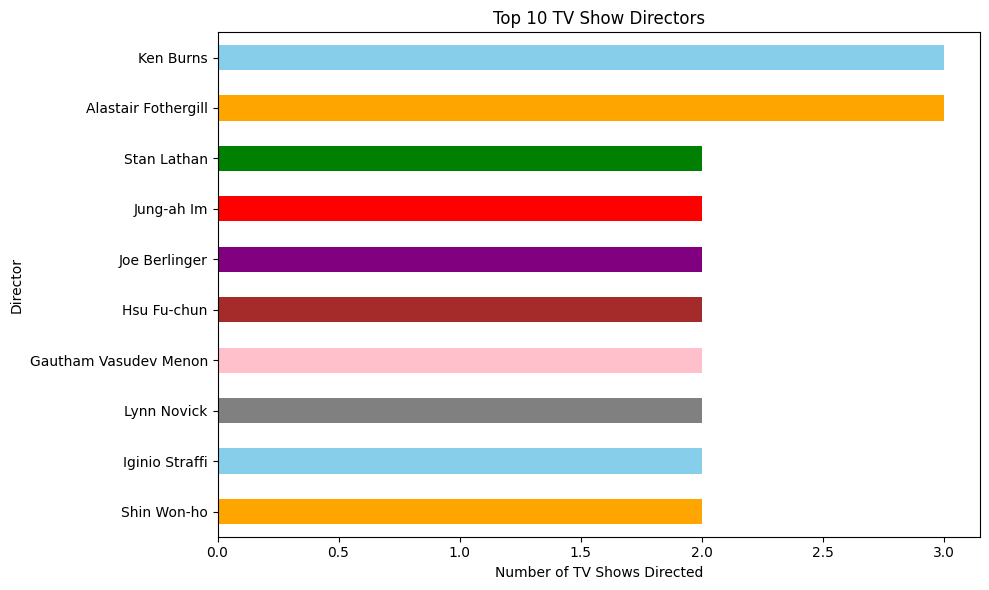

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
plt.figure(figsize=(10, 6))
top_10_tv_shows_directors.plot(kind='barh', color=colors)

plt.title('Top 10 TV Show Directors')
plt.xlabel('Number of TV Shows Directed')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Invert y-axis to display the director with the highest count at the top
plt.tight_layout()  # Adjust layout
plt.show()

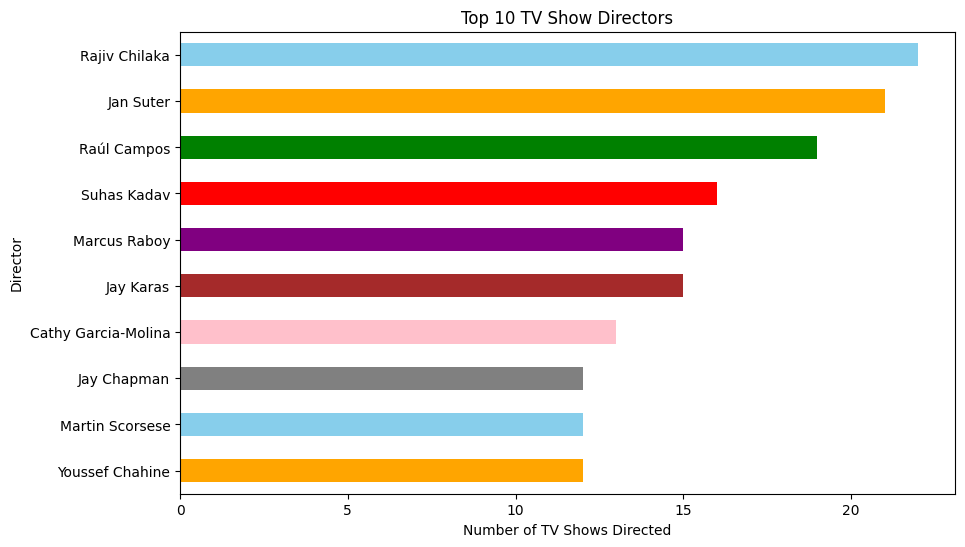

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
plt.figure(figsize=(10, 6))
top_10_movie_directors.plot(kind='barh', color=colors)

plt.title('Top 10 TV Show Directors')
plt.xlabel('Number of TV Shows Directed')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Invert y-axis to display the director with the highest count at the top
#plt.tight_layout()  # Adjust layout
plt.show()

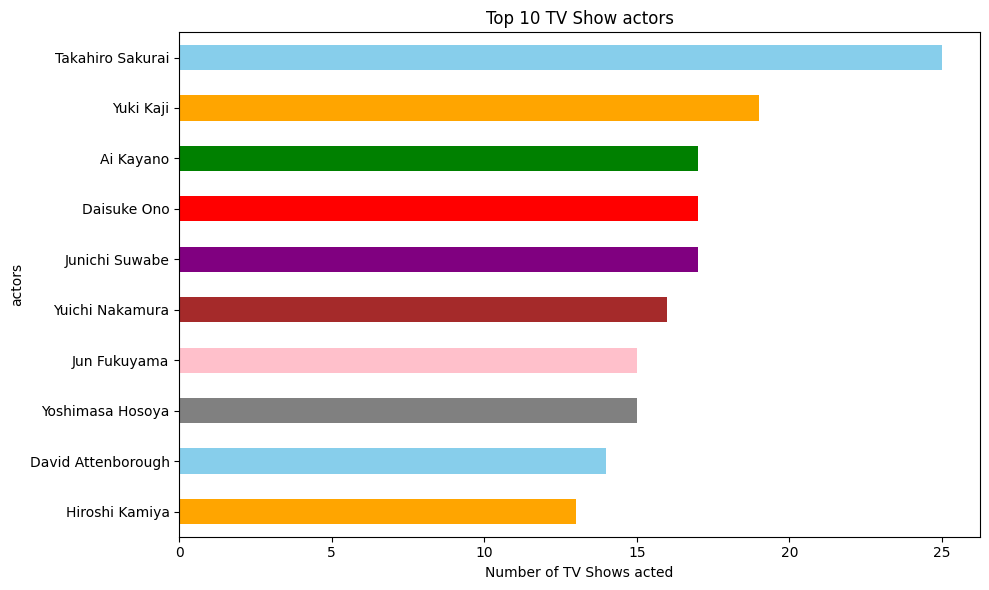

In [ ]:
# top_10_tv_shows_actors.plot(kind='bar',y='cast', orient = 'v')
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
plt.figure(figsize=(10, 6))
top_10_tv_shows_actors.plot(kind='barh', color=colors)

plt.title('Top 10 TV Show actors')
plt.xlabel('Number of TV Shows acted')
plt.ylabel('actors')
plt.gca().invert_yaxis()  # Invert y-axis to display the director with the highest count at the top
plt.tight_layout()  # Adjust layout
plt.show()

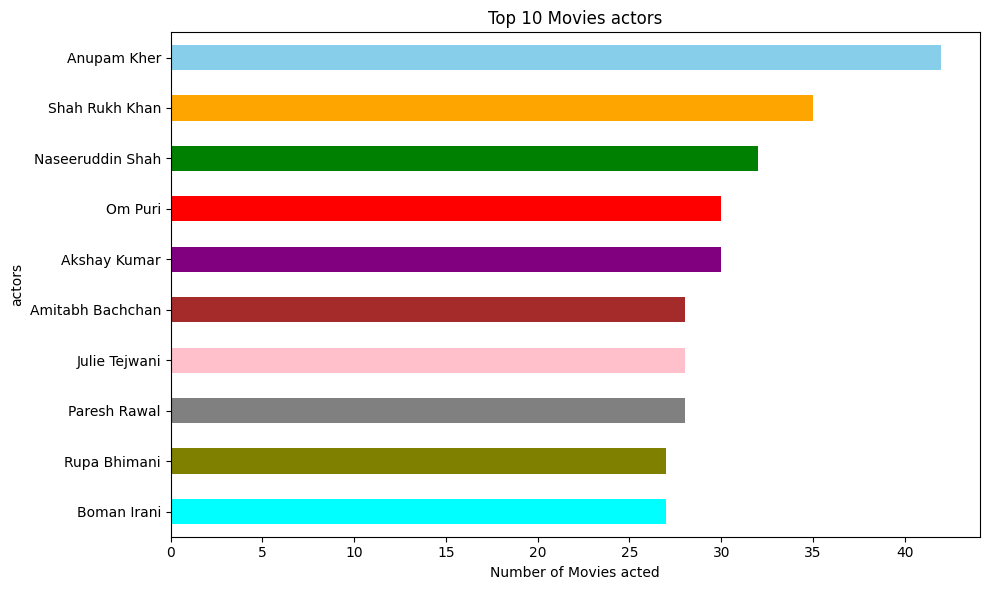

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray','olive', 'cyan']
plt.figure(figsize=(10, 6))
top_10_movie_actors.plot(kind='barh', color=colors)

plt.title('Top 10 Movies actors')
plt.xlabel('Number of Movies acted')
plt.ylabel('actors')
plt.gca().invert_yaxis()  # Invert y-axis to display the director with the highest count at the top
plt.tight_layout()  # Adjust layout
plt.show()

* The top 3 tv show directors are Ken Burns, Alastair Fothergill, Stan Lathan.
* The top 3 Movie directors are Rajiv Chilaka ,Jan Suter,Raúl Campos .

* According to the results there is a potential difference in production scale and approach between TV shows and movies, with movies being more prolific in terms of individual director output.

* The top 3 tv show actors are Takahiro Sakurai, Yuki Kaji, Ai Kayano.
* The top 3 Movie actors are Anupam Kher,Shah Rukh Khan,Naseeruddin Shah.
* TV show actors display a wider range of projects, with the top actor appearing in 25 shows, while movie actors tend to concentrate more, with the top actor starring in 42 films.

* Movie actors may commit to longer-term projects, resulting in a more concentrated list.




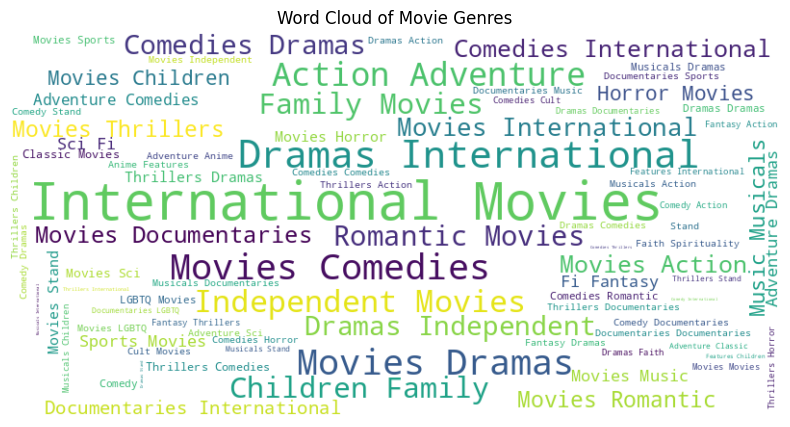

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all genres into a single string
all_genres = ' '.join(df[df['type'] == 'Movie']['listed_in'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres')
plt.show()


## 6. Find After how many days the movie will be added to Netflix after the release of *the* movie (you can consider the recent past data)

In [ ]:
df['year'] = df['date_added'].dt.year
df['release_year'] =df['release_year'].astype('int64')
last_5_years_data = df[df['release_year']>=2017]
last_5_years_data['release_year'].unique()

array([2020, 2021, 2018, 2017, 2019])

In [ ]:
last_5_years_data['year']=last_5_years_data['year'].astype('int')

last_5_years_data['difference']=last_5_years_data['year']-last_5_years_data['release_year']
last_5_years_data['difference'].mode()

0    0
Name: difference, dtype: int64

Observation:

* It indicates that most no content are released and added on netflix in the same year

<Axes: xlabel='release_year', ylabel='Count'>

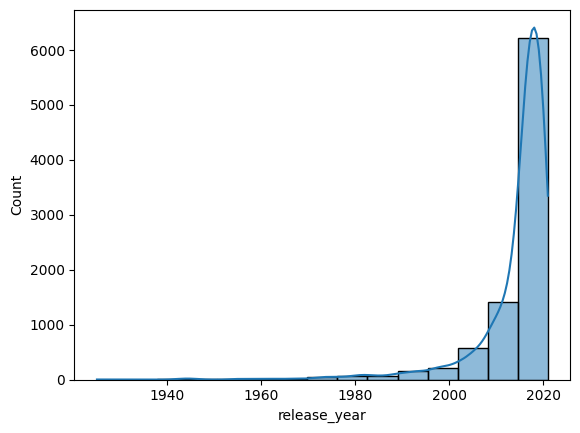

In [ ]:
sns.histplot(x='release_year',data=df,bins=15,kde=True)

Observation:
*
In 2020 most amount content was produced


In [ ]:
top10_countries.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico'],
      dtype='object', name='country')

# Heat Map

## Country and rating correlation

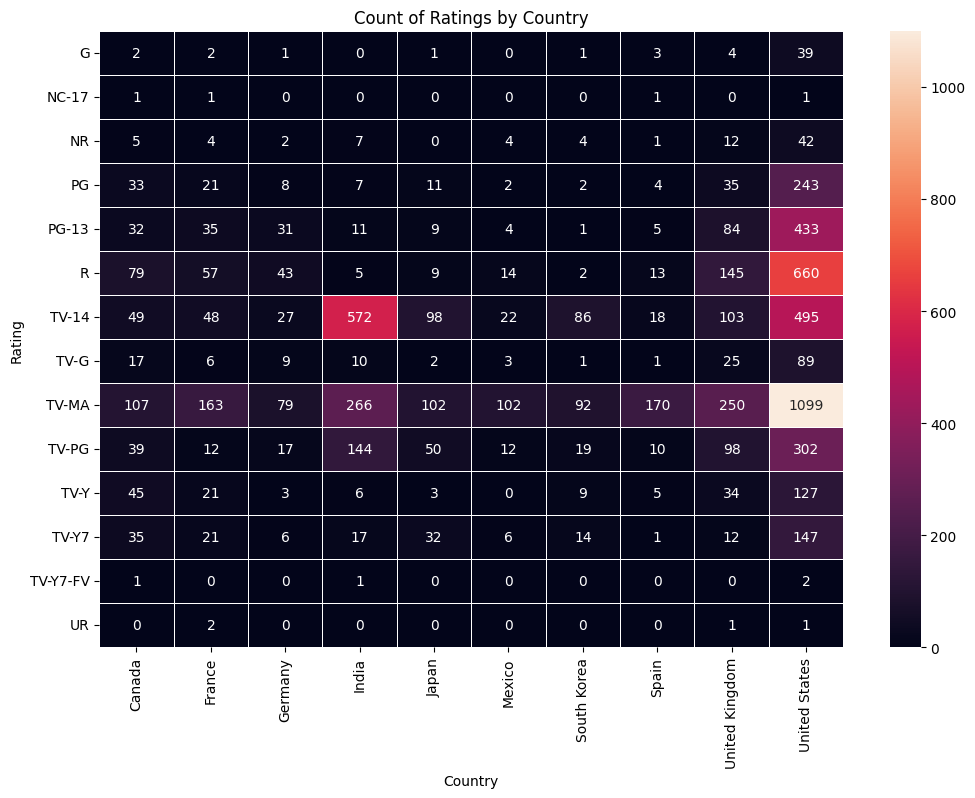

In [ ]:
countries = countries.merge(df[['title','rating']],on='title',how='left')
countries = countries[countries['rating'].isin(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR',
       'TV-Y7-FV', 'UR'])]

top_countries = countries[countries['country'].isin(top10_countries.index)]
top_countries.reset_index(drop=True,inplace=True)

rating_country_counts=top_countries.groupby(['rating', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(rating_country_counts, annot=True, fmt='d', linewidths=.5)
plt.title('Count of Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.show()


* We can observe the ratings TV-MA,TV-14, R are positively correlated.
* Netflix offers a substantial amount of adult content across all countries, encompassing ratings such as TV-MA and TV-14.
* In India, there's a notable presence of titles rated TV-PG, alongside TV-MA and TV-14.
* Content designated for young audiences (TV-Y and TV-Y7) is only available in select countries, including the US, Canada, UK, France, and Japan.

# Box plot


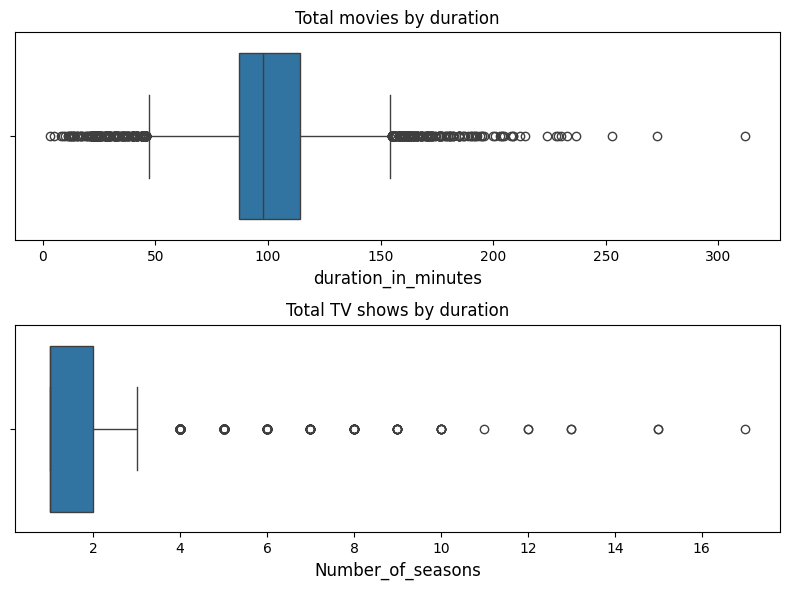

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = df , x = 'minutes' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = df , x = 'season' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

* For movies, the typical duration falls within the range of 50 to 150 minutes, excluding potential outliers lying beyond the whiskers of a box plot.
* TV shows typically span 1 to 3 seasons, with this range excluding potential outliers.

## Missing/ outlier detection

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

* **'74 min', '84 min', '66 min'** These are not counted into rating category.
* These are wrong types or can say potential outliers.
* so I have removed these data while dealing with country vs rating heatmap

## How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
yearcount= df[['title','type','year_added','month_added']].groupby(['year_added','month_added'])['title'].count().reset_index()

Text(0.5, 1.0, 'No of movies added in each year')

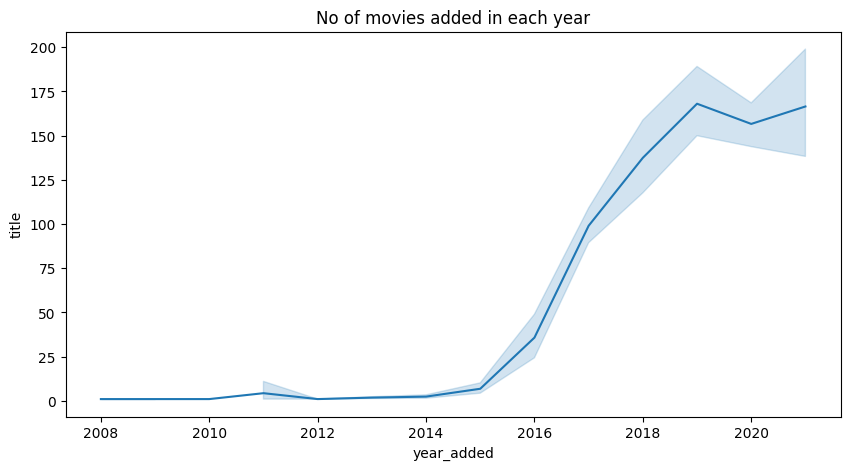

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year_added',y='title',data=yearcount)
plt.title('No of movies added in each year')

* Until 2014, there was a consistent shortage of content and a lack of hype surrounding the platform.
* However, starting from 2015, there has been a linear growth trajectory, with 2020 marking the peak in content production.


## Insights based on Non-Graphical and Visual Analysis

* Around 70 percent of Netflix's content is movies, and 30% is TV shows.
* There was a slight drop in 2020 and 2021, likely due to the pandemic(), but TV shows were less affected than movies.

* Since 2018, there's been fewer new movies but more TV shows. By mid-2020, TV shows outnumbered movies, showing a rising interest in TV content.

* Netflix features work from about 4,994 directors and content from 122 countries, with the US contributing the most.

* Shows on Netflix are mostly from 2005 to 2021, and movies typically run between 50 to 150 minutes, while TV shows have 1 to 3 seasons.

* Most content is rated TV-MA for mature audiences, with the US having more varied ratings available than other countries.

* The top genres on Netflix are international movies, dramas, and comedies, with each country having its popular genres.

* Indian actors are prominent on Netflix, appearing in the most movies.

* Shorter movies have become popular over the last decade.

# Business Insights

* The majority of Netflix's content is released after the year 2000
* The absence of pre-2000 content could leave senior citizens, who might be interested in such content, underserved.
* Users prefer Dramas, Comedies, Action & Adventure, Independent Movies, and Romantic Movies the most. This can help decide what content to add and make.

* The most popular genres on Netflix include international movies and TV shows, dramas, comedies, action & adventure, children & family movies, and thrillers.

* Approximately 75% of Netflix's content originates from the top 10 countries, indicating a significant concentration. Expanding content offerings from other countries could foster business growth.


* A decline in content production is observed globally across all countries and content types in 2020 and 2021, likely due to the pandemic.

# Recommendations
* Aim content at people aged 17 and older, with a focus on mystery and mature themes, as shown in the heat map.
* Tailor content for different countries based on their favorite genres to reach specific groups better.
* Create subscription plans especially for students, who make up a large part of our audience.
* Make content with shorter duration.

In [ ]:
print("The end")

The end
